In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
diabetes.data.shape

(442, 10)

In [7]:
diabetes.target.shape

(442,)

In [8]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
pd.set_option('display.precision',4)
pd.set_option('display.max_columns',9)
pd.set_option('display.width', None)

In [10]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['Y'] = pd.Series(diabetes.target)
diabetes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,Y
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [11]:
diabetes_df.describe()

,age,sex,bmi,bp,...,s4,s5,s6,Y
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,...,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,...,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,...,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,...,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,...,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,...,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,...,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,...,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


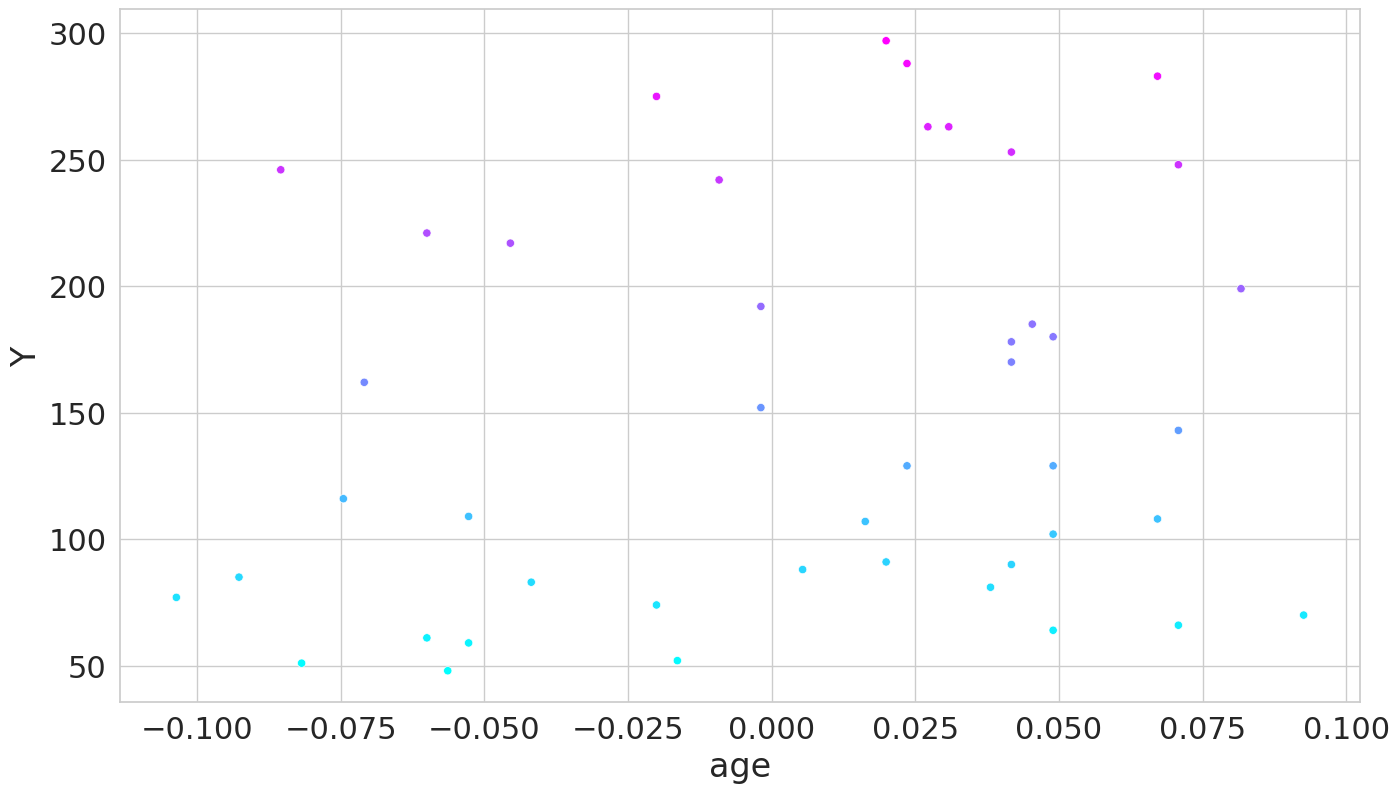

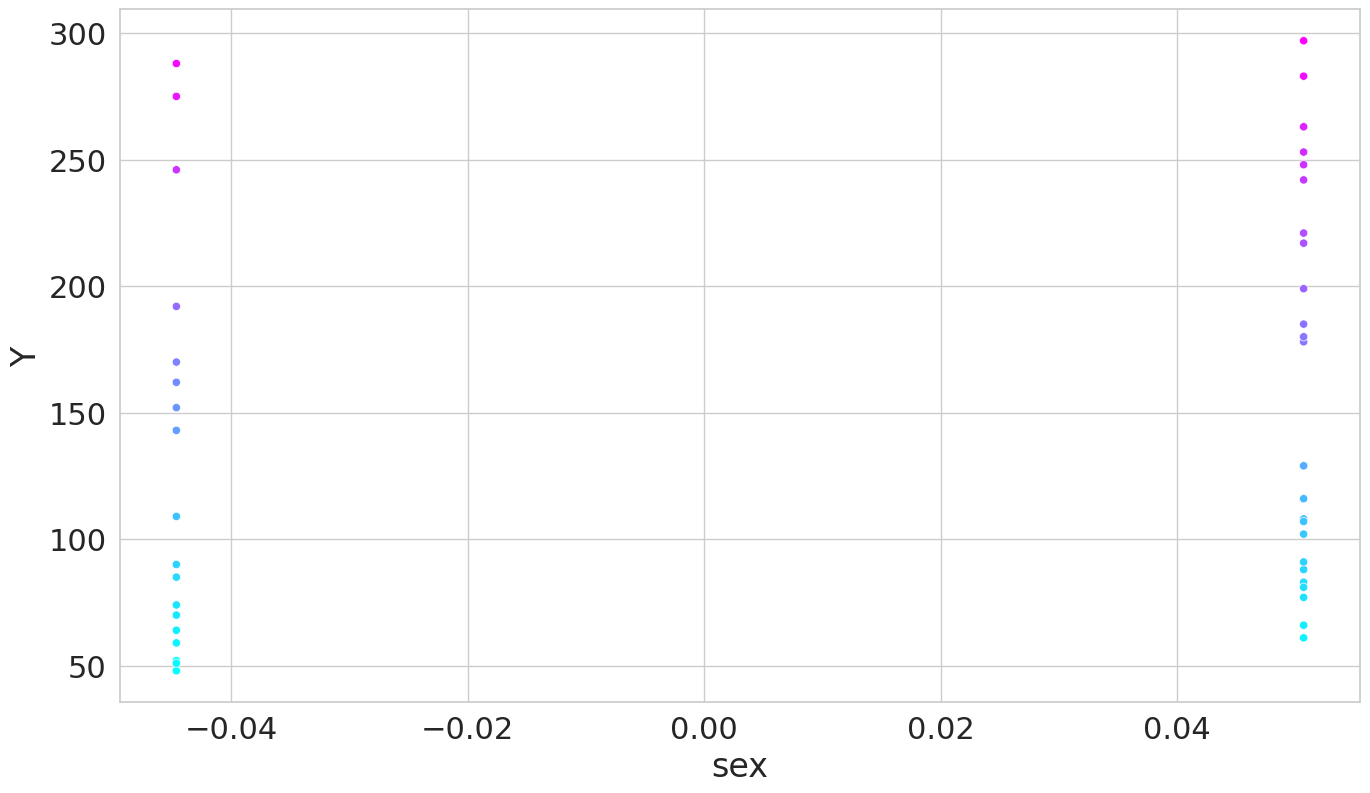

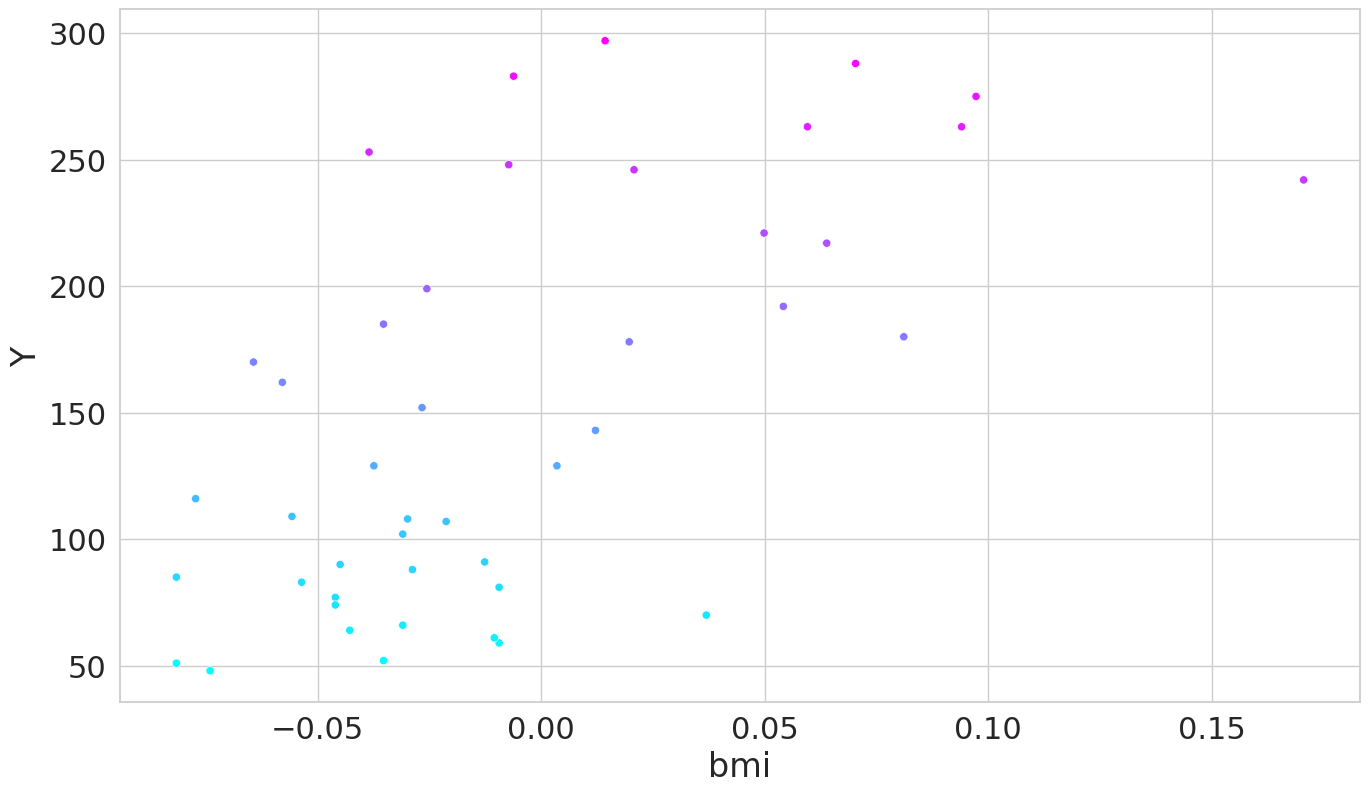

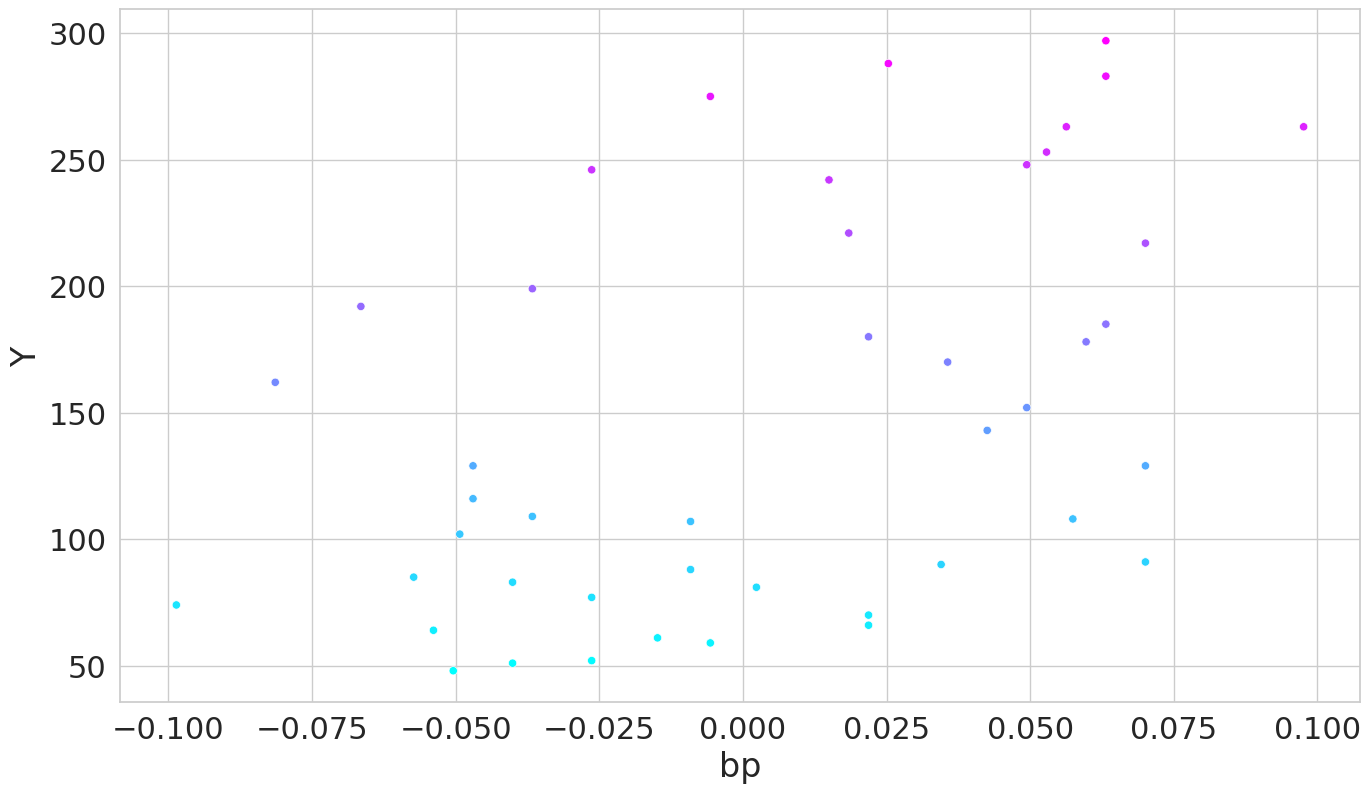

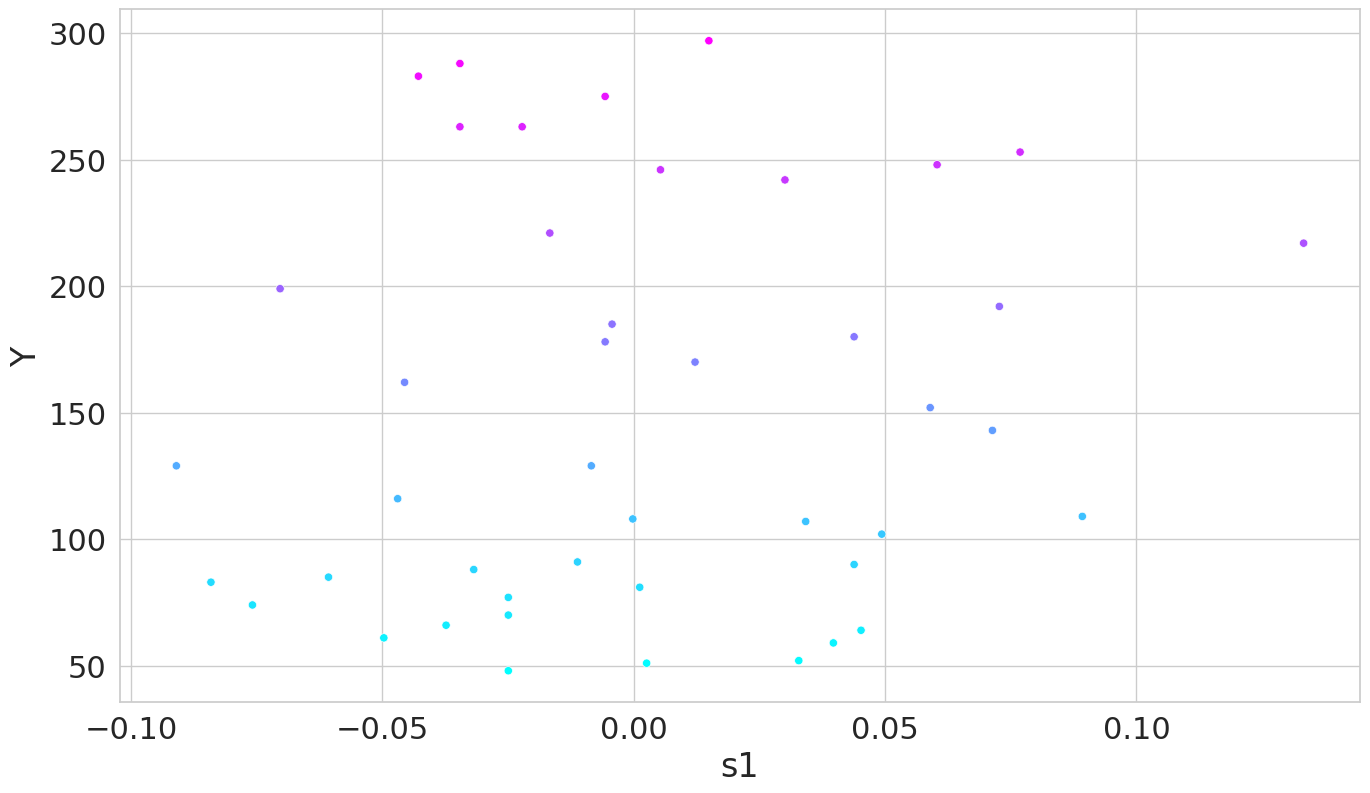

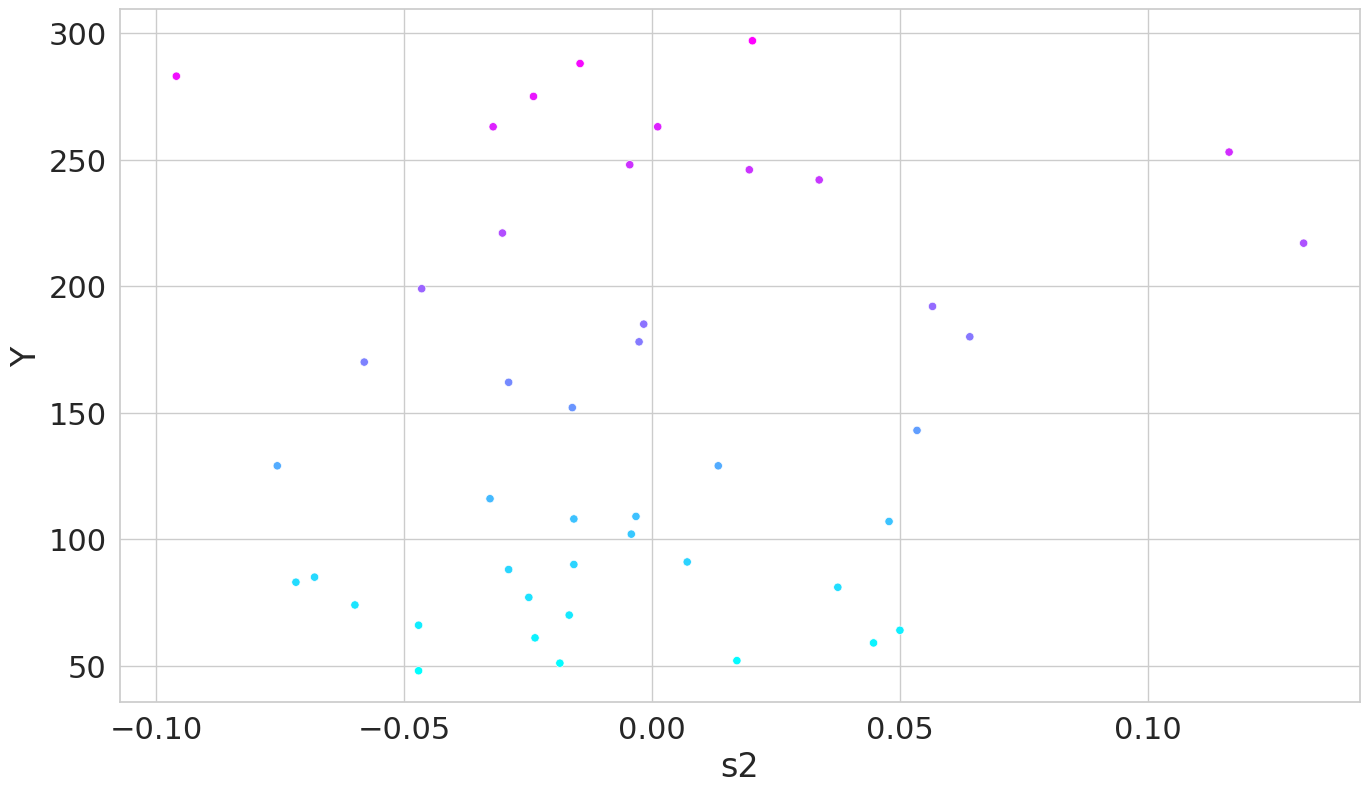

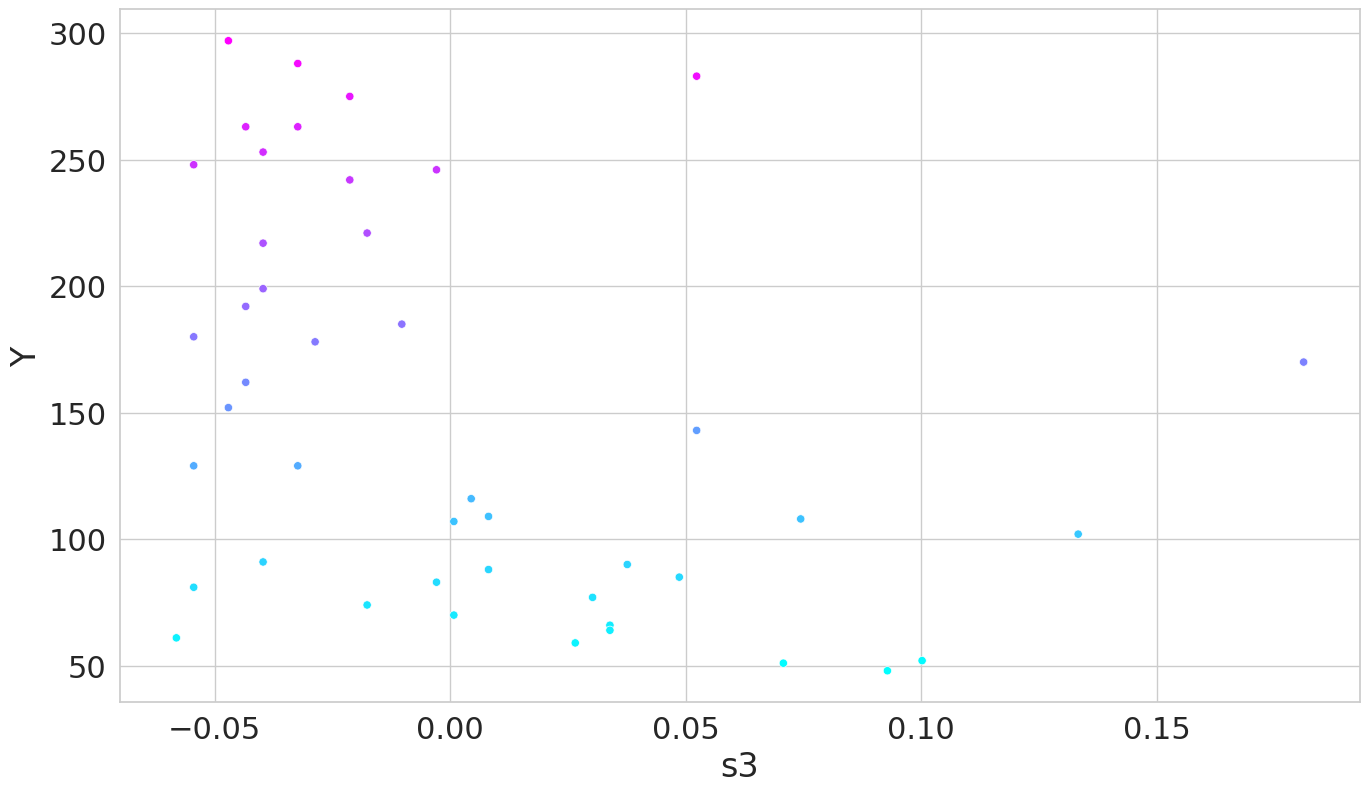

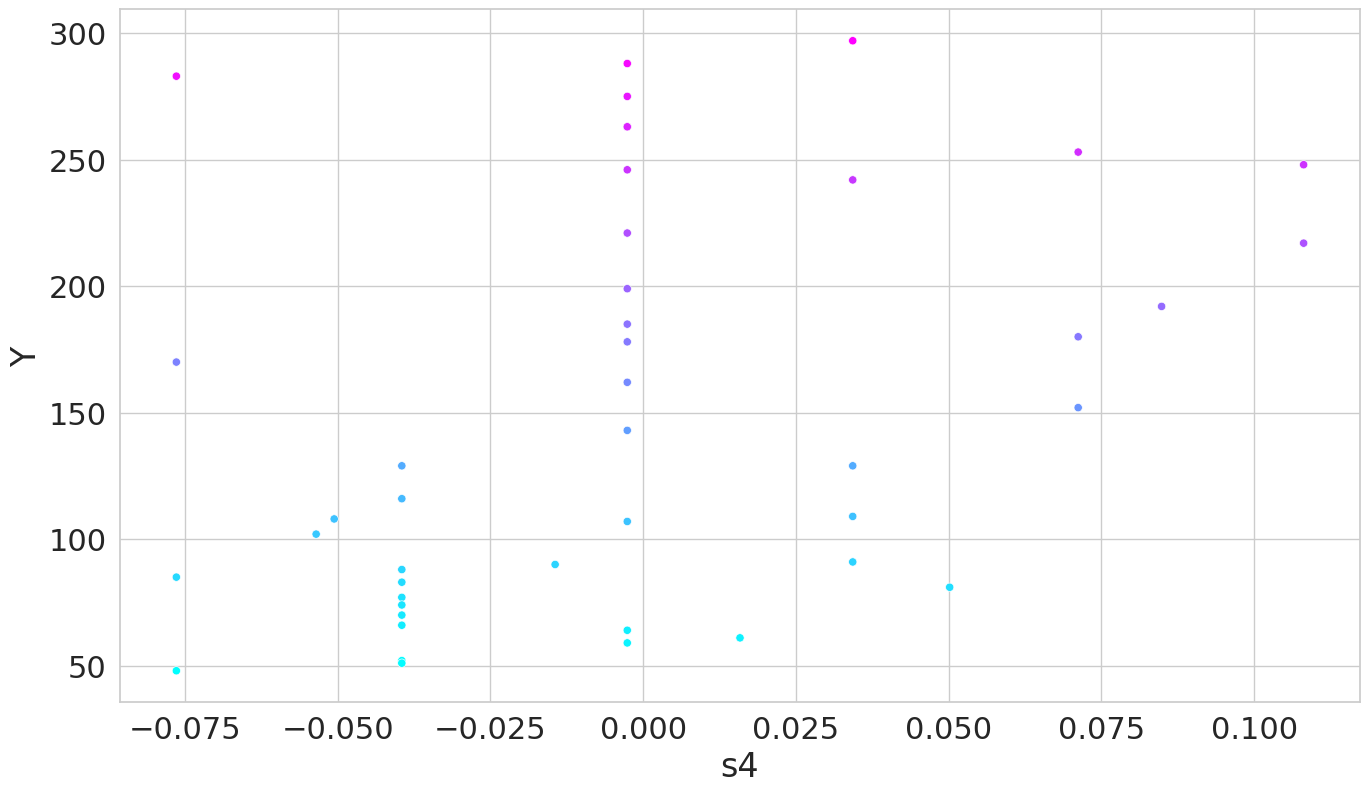

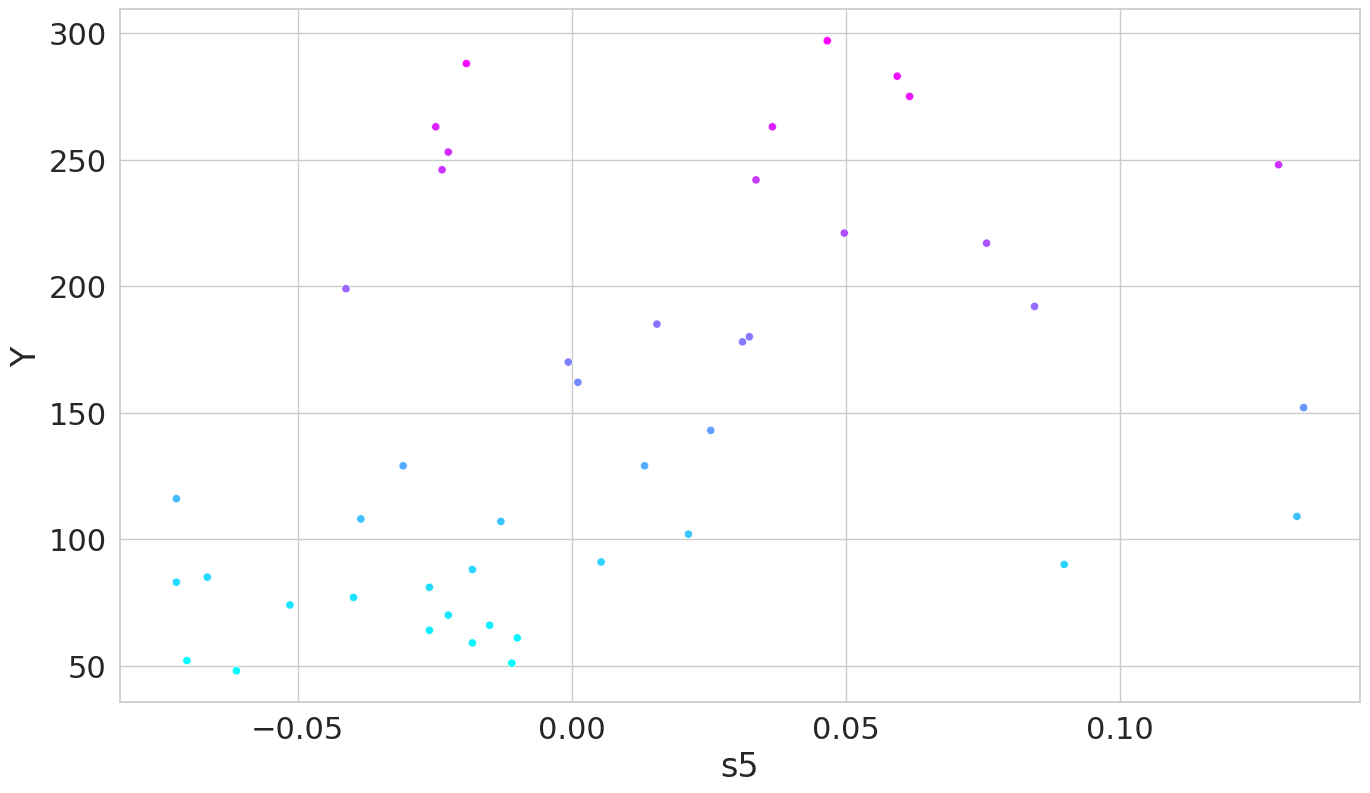

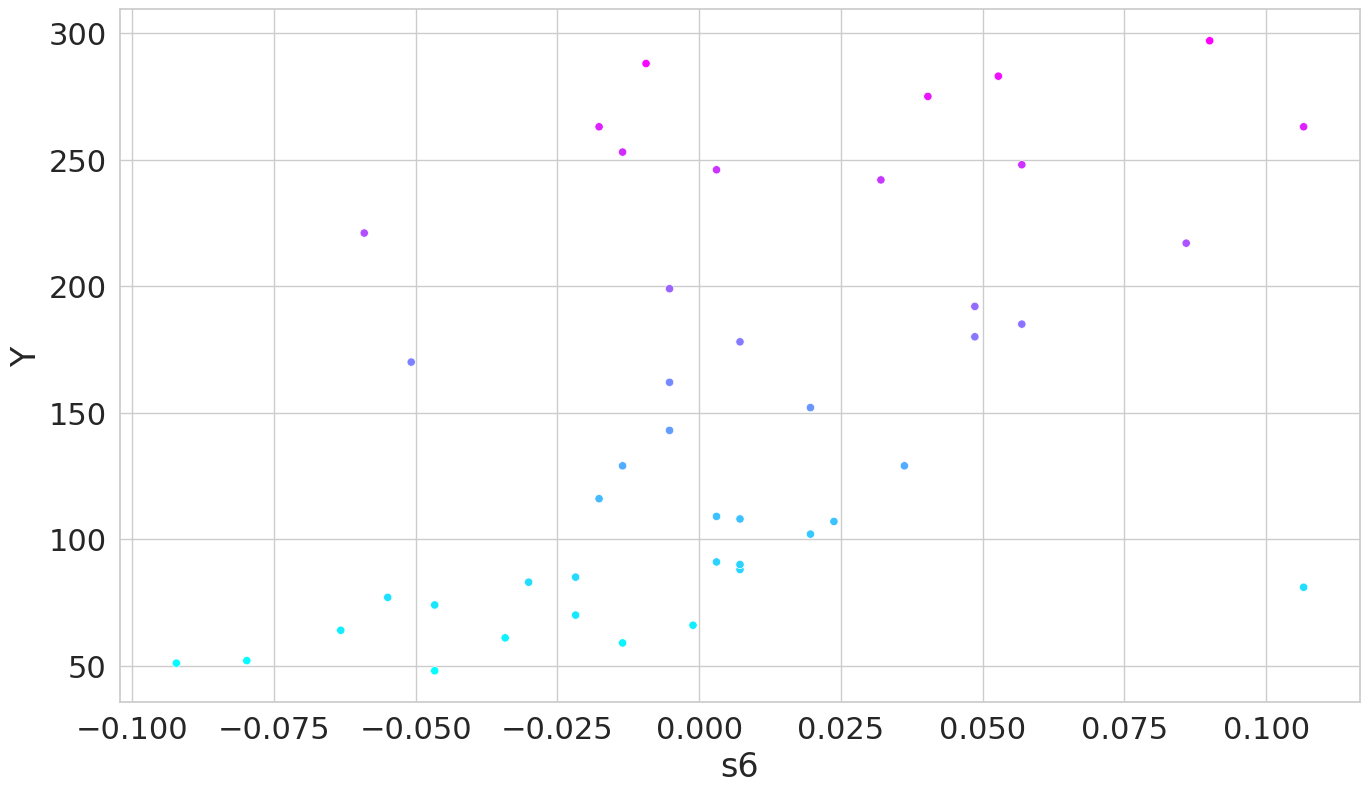

In [12]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)
import seaborn as sns
sns.set(font_scale=2)
sns.set_style('whitegrid')

for feature in diabetes.feature_names:
    plt.figure(figsize=(16,9))
    sns.scatterplot(data=sample_df, x=feature, y='Y', hue='Y', palette='cool', legend=False)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)
X_train.shape

(331, 10)

In [14]:
X_test.shape

(111, 10)

In [15]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [16]:
for i, name in enumerate(diabetes.feature_names): print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [17]:
linear_regression.intercept_

152.22822762230342

In [18]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)
predicted = linear_regression.predict(X_test)
expected = y_test

In [19]:
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [20]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

15.5.7

(37.0, 332.0)

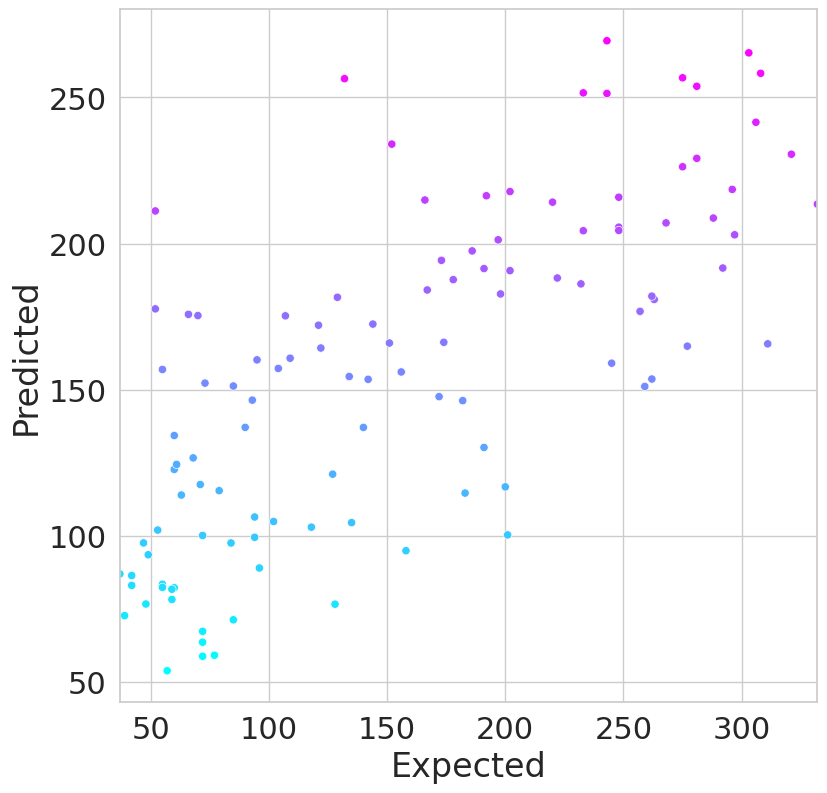

In [21]:
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())
axes.set_xlim(start, end)

In [22]:
axes.set_ylim(start, end)

(37.0, 332.0)

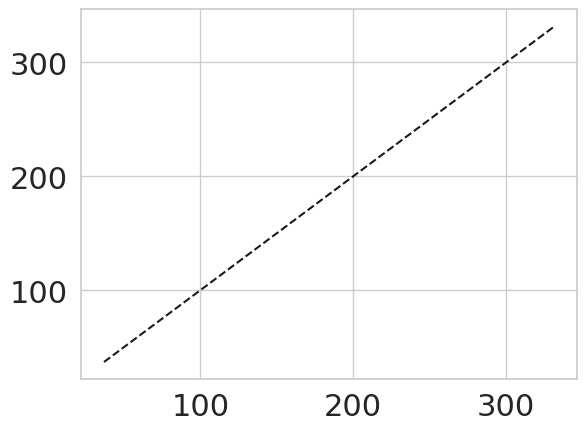

In [23]:
line = plt.plot([start,end], [start,end], 'k--')

15.5.8

In [24]:
from sklearn import metrics
metrics.r2_score(expected, predicted)

0.5322429620529407

In [25]:
metrics.mean_squared_error(expected, predicted)

3458.2307025173577

15.5.9

In [26]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [29]:
from sklearn.model_selection import KFold, cross_val_score
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
    print(f'{estimator_name:>16}: ' + f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
